<a href="https://colab.research.google.com/github/7ydini/Hybrid-Modeling/blob/main/Hybrid_Modeling_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import random
import itertools as it

from threading import Thread

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def show_seq(seq):
    sns.set_style('darkgrid')
    axis = sns.displot(seq, kde=True, rug=True, discrete=True)
    axis.set(xlabel='Количество элементов в очереди', ylabel='Частота повторений')
    plt.show()

In [3]:
class Handler:
    is_busy = False
    iterations_until_free = 0
    current_task = -1

    @staticmethod
    def handle(queue):
        if not queue:
            return
        task = queue[0]
        if task <= 0:
            time.sleep(0.3)
            queue.pop(0)
            return
        if Handler.iterations_until_free == 0:
            print('\033[95m Started processing', task)
            print('\033[0m', end='')
            Handler.iterations_until_free = task
            Handler.is_busy = False
            Handler.current_task = queue.pop(0)
        else:
            print('[', queue[0], '... ]',
                  'should wait',
                  '\033[92m' if Handler.iterations_until_free == 1 else '\033[93m',
                  Handler.iterations_until_free,
                  'cycles')
            print('\033[0m', end='')
            Handler.is_busy = True
            Handler.iterations_until_free -= 1
            time.sleep(0.1)
        return Handler.is_busy

def task_sender(queue):
    while True:
        if len(queue) > 3 and random.randint(0,100) < 10:
            queue.append(-100)
            return
        queue.append(random.randint(-5,10))
        time.sleep(0.1)

In [4]:
queue = []
queue_memorized = []
queue_len = []

filler = Thread(target=lambda: task_sender(queue))
filler.start()

In [5]:
# Ждем, пока очередь не заполнится хотя бы одним элементом
while len(queue) == 0:
    pass

start_time = time.time()

while True:
    try:
        if queue[0] == -100:
            break
        queue_len.append(len(queue))
        if not Handler.is_busy:
            queue_memorized.append((queue[0], time.time() - start_time))
        Handler.handle(queue)
    except KeyboardInterrupt:
        break
    except Exception:
        pass


 Started processing 8
[ 5 ... ] should wait  8 cycles
[ 5 ... ] should wait  7 cycles
[ 5 ... ] should wait  6 cycles
[ 5 ... ] should wait  5 cycles
[ 5 ... ] should wait  4 cycles
[ 5 ... ] should wait  3 cycles
[ 5 ... ] should wait  2 cycles
[ 5 ... ] should wait  1 cycles
 Started processing 5
[ 10 ... ] should wait  5 cycles
[ 10 ... ] should wait  4 cycles
[ 10 ... ] should wait  3 cycles
[ 10 ... ] should wait  2 cycles
[ 10 ... ] should wait  1 cycles
 Started processing 10
[ 10 ... ] should wait  10 cycles
[ 10 ... ] should wait  9 cycles
[ 10 ... ] should wait  8 cycles
[ 10 ... ] should wait  7 cycles
[ 10 ... ] should wait  6 cycles
[ 10 ... ] should wait  5 cycles
[ 10 ... ] should wait  4 cycles
[ 10 ... ] should wait  3 cycles
[ 10 ... ] should wait  2 cycles
[ 10 ... ] should wait  1 cycles
 Started processing 10
[ 7 ... ] should wait  10 cycles
[ 7 ... ] should wait  9 cycles
[ 7 ... ] should wait  8 cycles
[ 7 ... ] should wait  7 cycles
[ 7 ... ] should wait  6 cycl

Среднее время нахождения заявки в системе: 2.3703649725232805
Среднее время простоя обработчика: 2.5409968495368958
[1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 9, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 2, 2]
Средняя длина очереди: 5.471698113207547
Максимальная длина очереди: 9


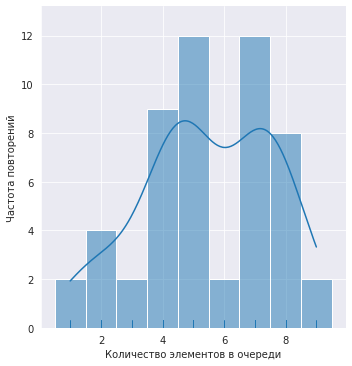

In [6]:
true_tasks = list(filter(lambda t: t[0] > 0, queue_memorized))
do_noting_tasks = list(filter(lambda t: t[0] <= 0, queue_memorized))

true_tasks_average = sum([t[1] for t in true_tasks])/len(true_tasks)
do_nothing_average = sum([d[1] for d in do_noting_tasks])/len(do_noting_tasks)

print('Среднее время нахождения заявки в системе:', true_tasks_average)
print('Среднее время простоя обработчика:', do_nothing_average)

print(queue_len)
queue_len_average = sum(queue_len)/len(queue_len)
print('Средняя длина очереди:', queue_len_average)
print('Максимальная длина очереди:', max(queue_len))

show_seq(queue_len)